In [1]:
import s3fs
import numpy as np
import xarray as xr
import fsspec
import zarr
import timeit
import matplotlib.pyplot as plt
import statistics
import gc
from dask.distributed import Client

In [2]:
URL = 's3://mur-sst/zarr'

In [3]:
start_date = "2002-06-1"
end_date = "2002-06-10"

minlat = 0
maxlat = 5
minlon = -160
maxlon = -155

variables=[
    'analysed_sst', 
    'mask'
]

### Single Day Baseline

In [11]:
mur_global = xr.open_zarr(
    fsspec.get_mapper(URL, anon=True), 
    consolidated=True, 
)

mur_hawaii = mur_global[variables].sel(
    time=start_date,
    lat=slice(minlat, maxlat), 
    lon=slice(minlon, maxlon),
)
print("Dataset dimensions: " + str(mur_hawaii.dims))
print("Number of bytes: " + str(mur_hawaii.nbytes))

Dataset dimensions: Frozen({'time': 1, 'lat': 501, 'lon': 501})
Number of bytes: 1259021


### Static Time Dimension Test

In [ ]:
# num_bytes_static = []
# ts_runtime_static = []
# sp_runtime_static = []

Coordinate Box: 0 5 -160 -155
Open subset: 0.006112143000791548
Dataset dimensions: Frozen({'time': 10, 'lat': 501, 'lon': 501})
Number of bytes: 12554138
Create time series: 60.76290607999999


/home/ec2-user/miniconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


Create spatial plot: 44.138019982000515


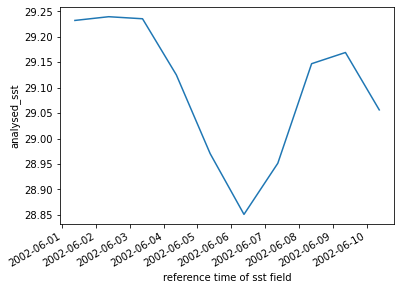

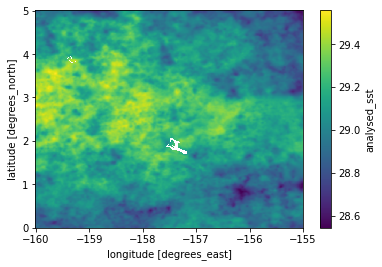

Coordinate Box: 0 10 -160 -150
Open subset: 0.006179289999636239
Dataset dimensions: Frozen({'time': 10, 'lat': 1001, 'lon': 1001})
Number of bytes: 50108138
Create time series: 231.24170533300003


/home/ec2-user/miniconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


Create spatial plot: 261.8877996599995


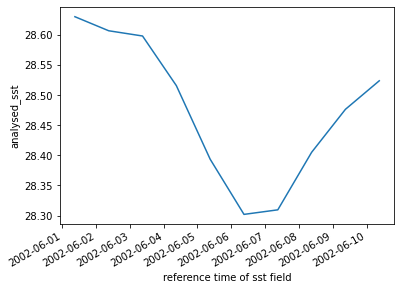

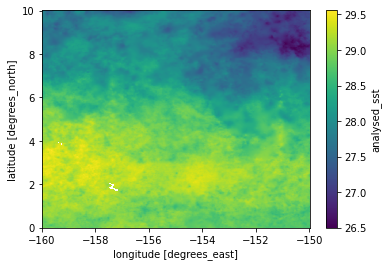

Coordinate Box: 0 15 -160 -145
Open subset: 0.006485507000434154
Dataset dimensions: Frozen({'time': 10, 'lat': 1501, 'lon': 1501})
Number of bytes: 112662138
Create time series: 629.7576661879993


/home/ec2-user/miniconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


Create spatial plot: 577.1703369119996


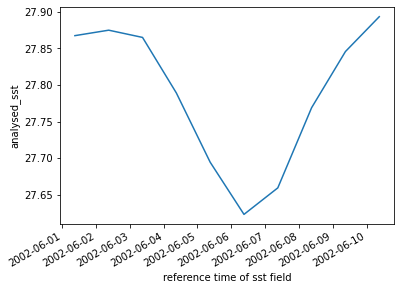

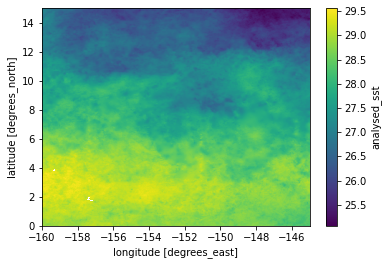

Coordinate Box: 0 20 -160 -140
Open subset: 0.006516160000501259
Dataset dimensions: Frozen({'time': 10, 'lat': 2001, 'lon': 2001})
Number of bytes: 200216138
Create time series: 1017.4710054360003


/home/ec2-user/miniconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


Create spatial plot: 996.7377543480006


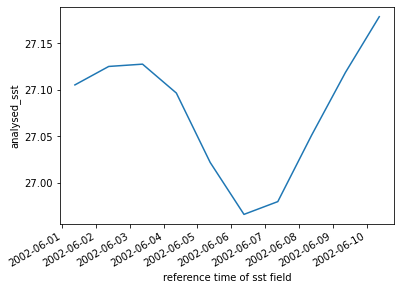

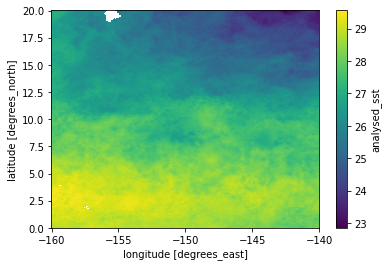

Coordinate Box: 0 25 -160 -135
Open subset: 0.007315921999179409
Dataset dimensions: Frozen({'time': 10, 'lat': 2501, 'lon': 2501})
Number of bytes: 312770138


In [ ]:
for iter in range(0, 25):
    print("Coordinate Box: " + str(minlat) + " " + str(maxlat) + " " + str(minlon) + " " + str(maxlon))
    
    mur_global = xr.open_zarr(
        fsspec.get_mapper(URL, anon=True), 
        consolidated=True, 
    )
    
    start_time = timeit.default_timer()
    mur_hawaii = mur_global[variables].sel(
        time=slice(start_date, end_date),
        lat=slice(minlat, maxlat), 
        lon=slice(minlon, maxlon),
    )
    elapsed = timeit.default_timer() - start_time
    print("Open subset: " + str(elapsed))
    
    print("Dataset dimensions: " + str(mur_hawaii.dims))
    print("Number of bytes: " + str(mur_hawaii.nbytes))
    num_bytes_static.append(mur_hawaii.nbytes)
    
    mur_hawaii_sst = mur_hawaii['analysed_sst'].where(mur_hawaii.mask == 1)
    mur_hawaii_sst = mur_hawaii_sst - 273.15
    mur_hawaii_sst
    mur_hawaii_sst_mean_ts = mur_hawaii_sst.mean(['lat', 'lon'])
    mur_hawaii_sst_mean_sp = mur_hawaii_sst.mean(['time'])
    
    start_time = timeit.default_timer()
    fig1, ax1 = plt.subplots()
    mur_hawaii_sst_mean_ts.plot(ax=ax1)
    elapsed = timeit.default_timer() - start_time
    print("Create time series: " + str(elapsed))
    
    ts_runtime_static.append(elapsed)
    
    start_time = timeit.default_timer()
    fig2, ax2 = plt.subplots()
    mur_hawaii_sst_mean_sp.plot(ax=ax2)
    elapsed = timeit.default_timer() - start_time
    print("Create spatial plot: " + str(elapsed))
    
    sp_runtime_static.append(elapsed)
    
    plt.show()
    
    maxlat += 5
    maxlon += 5

Test fails on 312770138 bytes (312.77 MB).

In [4]:
num_bytes_static = [12554138, 50108138, 112662138, 200216138]
ts_runtime_static = [60.76, 231.24, 629.76, 1017.47]
sp_runtime_static = [44.14, 261.89, 577.12, 996.74]

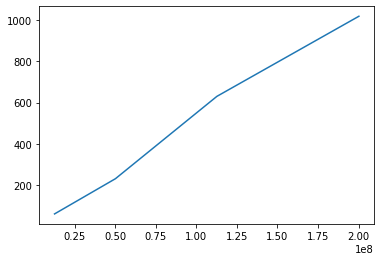

In [5]:
plt.plot(num_bytes_static, ts_runtime_static)

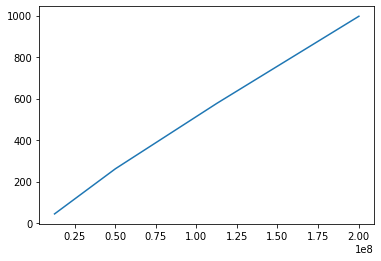

In [6]:
plt.plot(num_bytes_static, sp_runtime_static)

### Test with Scaling Time Dimension

In [17]:
dates = ['2002-06-05', '2002-06-10', '2002-06-15', '2002-06-20', '2002-06-25', '2002-06-30']
# num_bytes_scale = []
# ts_runtime_scale = []
# sp_runtime_scale = []

Coordinate Box: 0 5 -160 -155
Open subset: 0.011533809998582
Dataset dimensions: Frozen({'time': 5, 'lat': 501, 'lon': 501})
Number of bytes: 6279073
Create time series: 69.31905514999926


/home/ec2-user/miniconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


Create spatial plot: 51.3081068219999


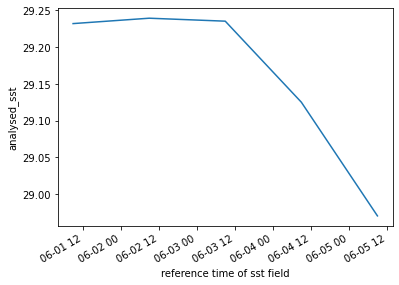

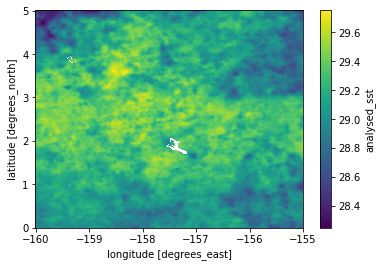

Coordinate Box: 0 10 -160 -150
Open subset: 0.006231109999134787
Dataset dimensions: Frozen({'time': 10, 'lat': 1001, 'lon': 1001})
Number of bytes: 50108138
Create time series: 232.38994477699998


/home/ec2-user/miniconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


Create spatial plot: 261.67862354800127


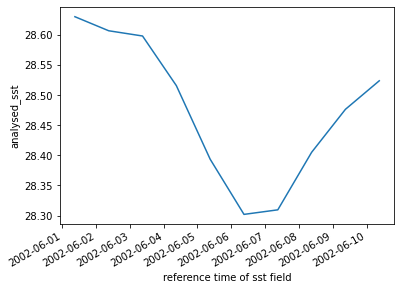

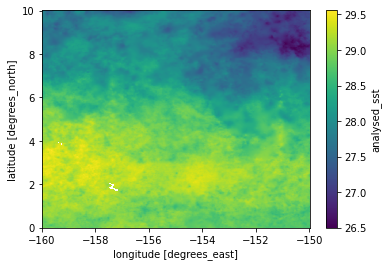

Coordinate Box: 0 15 -160 -145
Open subset: 0.006268443001317792
Dataset dimensions: Frozen({'time': 15, 'lat': 1501, 'lon': 1501})
Number of bytes: 168987203
Create time series: 533.2458291350013


/home/ec2-user/miniconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


Create spatial plot: 540.319698719999


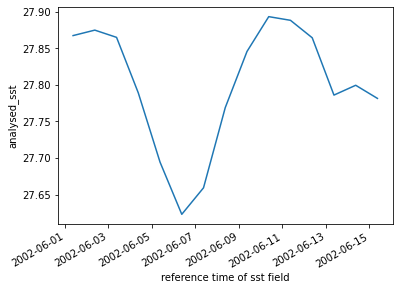

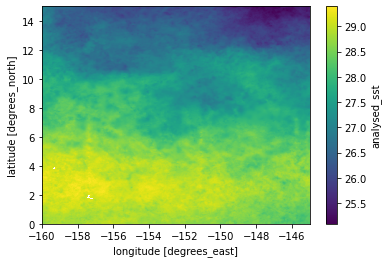

Coordinate Box: 0 20 -160 -140
Open subset: 0.006470603999332525
Dataset dimensions: Frozen({'time': 20, 'lat': 2001, 'lon': 2001})
Number of bytes: 400416268
Create time series: 939.7965219220005


/home/ec2-user/miniconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


Create spatial plot: 909.4493183970008


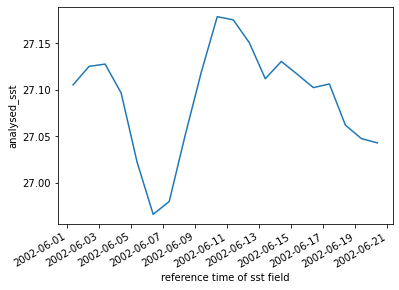

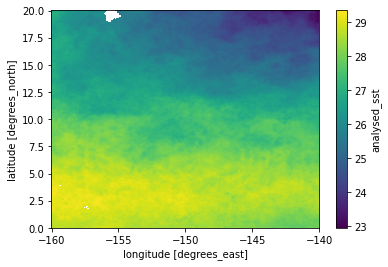

Coordinate Box: 0 25 -160 -135
Open subset: 0.007096867000655038
Dataset dimensions: Frozen({'time': 25, 'lat': 2501, 'lon': 2501})
Number of bytes: 781895333


In [ ]:
for iter in range(0, 25):
    print("Coordinate Box: " + str(minlat) + " " + str(maxlat) + " " + str(minlon) + " " + str(maxlon))
    
    mur_global = xr.open_zarr(
        fsspec.get_mapper(URL, anon=True), 
        consolidated=True, 
    )
    
    start_time = timeit.default_timer()
    mur_hawaii = mur_global[variables].sel(
        time=slice(start_date, dates[iter]),
        lat=slice(minlat, maxlat), 
        lon=slice(minlon, maxlon),
    )
    elapsed = timeit.default_timer() - start_time
    print("Open subset: " + str(elapsed))
    
    print("Dataset dimensions: " + str(mur_hawaii.dims))
    print("Number of bytes: " + str(mur_hawaii.nbytes))
    num_bytes_scale.append(mur_hawaii.nbytes)
    
    mur_hawaii_sst = mur_hawaii['analysed_sst'].where(mur_hawaii.mask == 1)
    mur_hawaii_sst = mur_hawaii_sst - 273.15
    mur_hawaii_sst
    mur_hawaii_sst_mean_ts = mur_hawaii_sst.mean(['lat', 'lon'])
    mur_hawaii_sst_mean_sp = mur_hawaii_sst.mean(['time'])
    
    start_time = timeit.default_timer()
    fig1, ax1 = plt.subplots()
    mur_hawaii_sst_mean_ts.plot(ax=ax1)
    elapsed = timeit.default_timer() - start_time
    print("Create time series: " + str(elapsed))
    
    ts_runtime_scale.append(elapsed)
    
    start_time = timeit.default_timer()
    fig2, ax2 = plt.subplots()
    mur_hawaii_sst_mean_sp.plot(ax=ax2)
    elapsed = timeit.default_timer() - start_time
    print("Create spatial plot: " + str(elapsed))
    
    sp_runtime_scale.append(elapsed)
    
    plt.show()
    
    maxlat += 5
    maxlon += 5

Test fails on 781895333 bytes (781.90 MB).

In [4]:
num_bytes_scale = [6279073, 50108138, 168987203, 400416268]
ts_runtime_scale = [69.32, 232.39, 533.25, 939.80]
sp_runtime_scale = [51.31, 261.68, 540.3, 909.45]

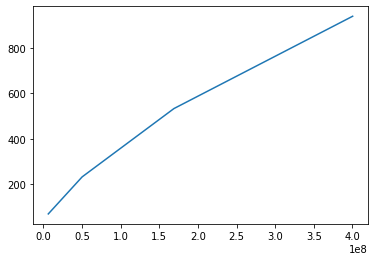

In [5]:
plt.plot(num_bytes_scale, ts_runtime_scale)

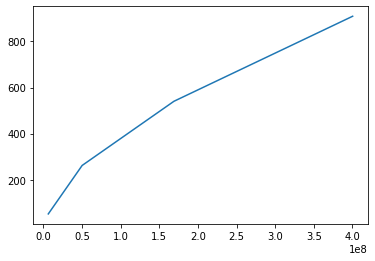

In [6]:
plt.plot(num_bytes_scale, sp_runtime_scale)